In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
train=  pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# EDA

In [3]:
print(train.shape,test.shape)

(8693, 14) (4277, 13)


**Transported** -> Tahmin edeceğimiz sütun

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
def missing_values_summary(df, name="DataFrame"):
    missing_count = df.isnull().sum()
    missing_percent = 100 * df.isnull().sum() / len(df)
    summary = pd.DataFrame({
        f"{name}_Missing_Count": missing_count,
        f"{name}_Missing_%": missing_percent.round(2)
    })
    return summary

Veri içerisinde yer yer boş veriler var bu yüzden filling gerekli. Missing yüzdelikleri çok fazla olmadığı için özellik silmeye başvurulmayacak

In [8]:
missing_summary = pd.concat([missing_values_summary(train, "Train"), missing_values_summary(test, "Test")], axis=1)
missing_summary

,Train_Missing_Count,Train_Missing_%,Test_Missing_Count,Test_Missing_%
PassengerId,0,0.00,0.0,0.00
HomePlanet,201,2.31,87.0,2.03
CryoSleep,217,2.50,93.0,2.17
Cabin,199,2.29,100.0,2.34
Destination,182,2.09,92.0,2.15
Age,179,2.06,91.0,2.13
VIP,203,2.34,93.0,2.17
RoomService,181,2.08,82.0,1.92
FoodCourt,183,2.11,106.0,2.48
ShoppingMall,208,2.39,98.0,2.29


In [9]:
def inf_values_summary(df, name="DataFrame"):
    numeric_df = df.select_dtypes(include=[np.number])
    inf_count = np.isinf(numeric_df).sum()
    inf_percent = 100 * inf_count / len(df)
    summary = pd.DataFrame({
        f"{name}_Inf_Count": inf_count,
        f"{name}_Inf_%": inf_percent.round(2)
    })
    return summary

infinite değer yok. Güzel:)

In [10]:
inf_summary = pd.concat([inf_values_summary(train, "Train"), inf_values_summary(test, "Test")], axis=1)
inf_summary

,Train_Inf_Count,Train_Inf_%,Test_Inf_Count,Test_Inf_%
Age,0,0.0,0,0.0
RoomService,0,0.0,0,0.0
FoodCourt,0,0.0,0,0.0
ShoppingMall,0,0.0,0,0.0
Spa,0,0.0,0,0.0
VRDeck,0,0.0,0,0.0


PassengerId, Cabin ve Name çok fazla unique değere sahip doğrudan encoding uygulayıp modele vermek çok doğru olmayabilir. Diğerleri için one-hot encoding uygun sayılabilir.

In [11]:
train.select_dtypes(include=["object","category"]).nunique()

PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

In [12]:
test.select_dtypes(include=["object","category"]).nunique()

PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64

unique değerleri görüyoruz

In [13]:
print(train["HomePlanet"].unique())
print(train["CryoSleep"].unique())
print(train["Destination"].unique())
print(train["VIP"].unique())

['Europa' 'Earth' 'Mars' nan]
[False True nan]
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
[False True nan]


train ve test veri dağılımlarının benzer olduğunu görüyoruz

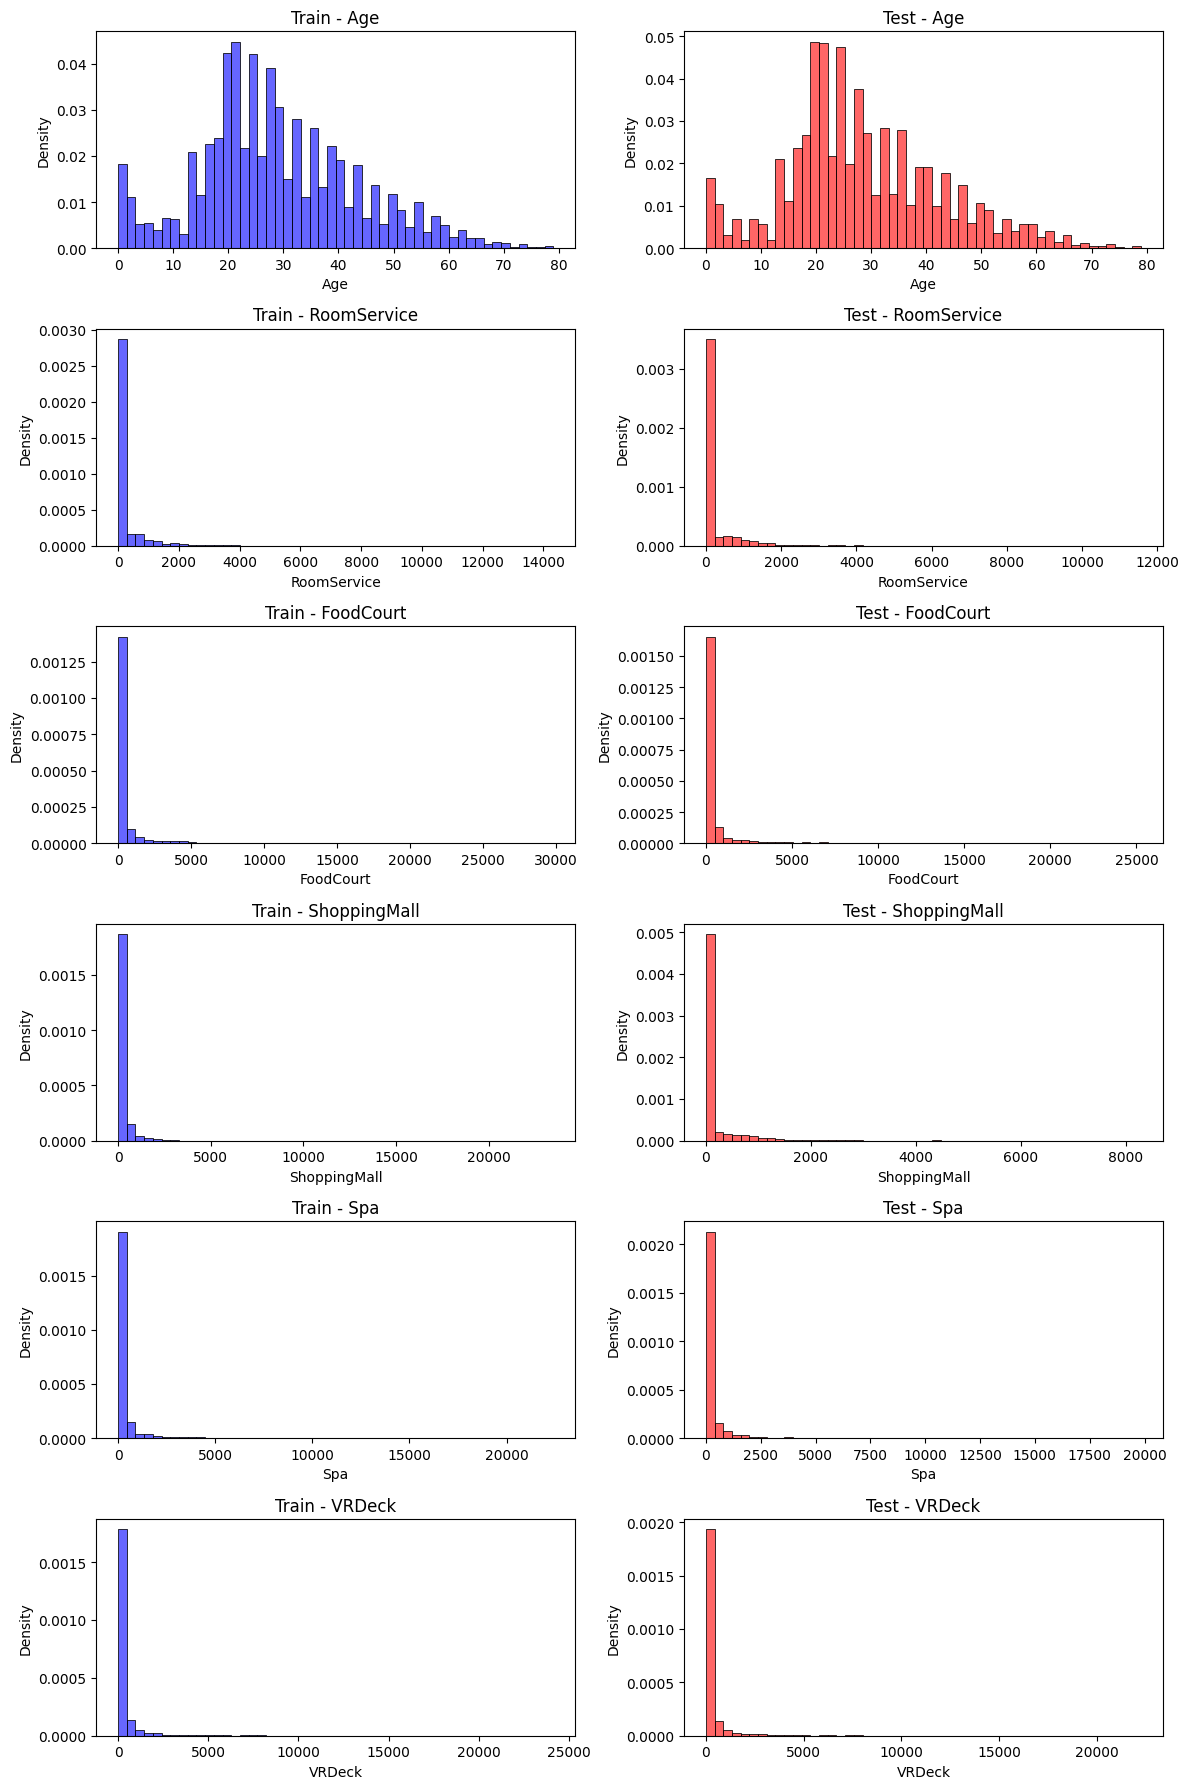

In [14]:
bins=50
numeric_cols = train.select_dtypes(include=[np.number]).columns
n_rows = len(numeric_cols)
plt.figure(figsize=(12, n_rows * 3))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, 2, 2*i + 1)
    sns.histplot(train[col], bins=bins, color="blue", stat="density", alpha=0.6)
    plt.title(f"Train - {col}")
    plt.subplot(n_rows, 2, 2*i + 2)
    sns.histplot(test[col], bins=bins, color="red", stat="density", alpha=0.6)
    plt.title(f"Test - {col}")

plt.tight_layout()
plt.show()

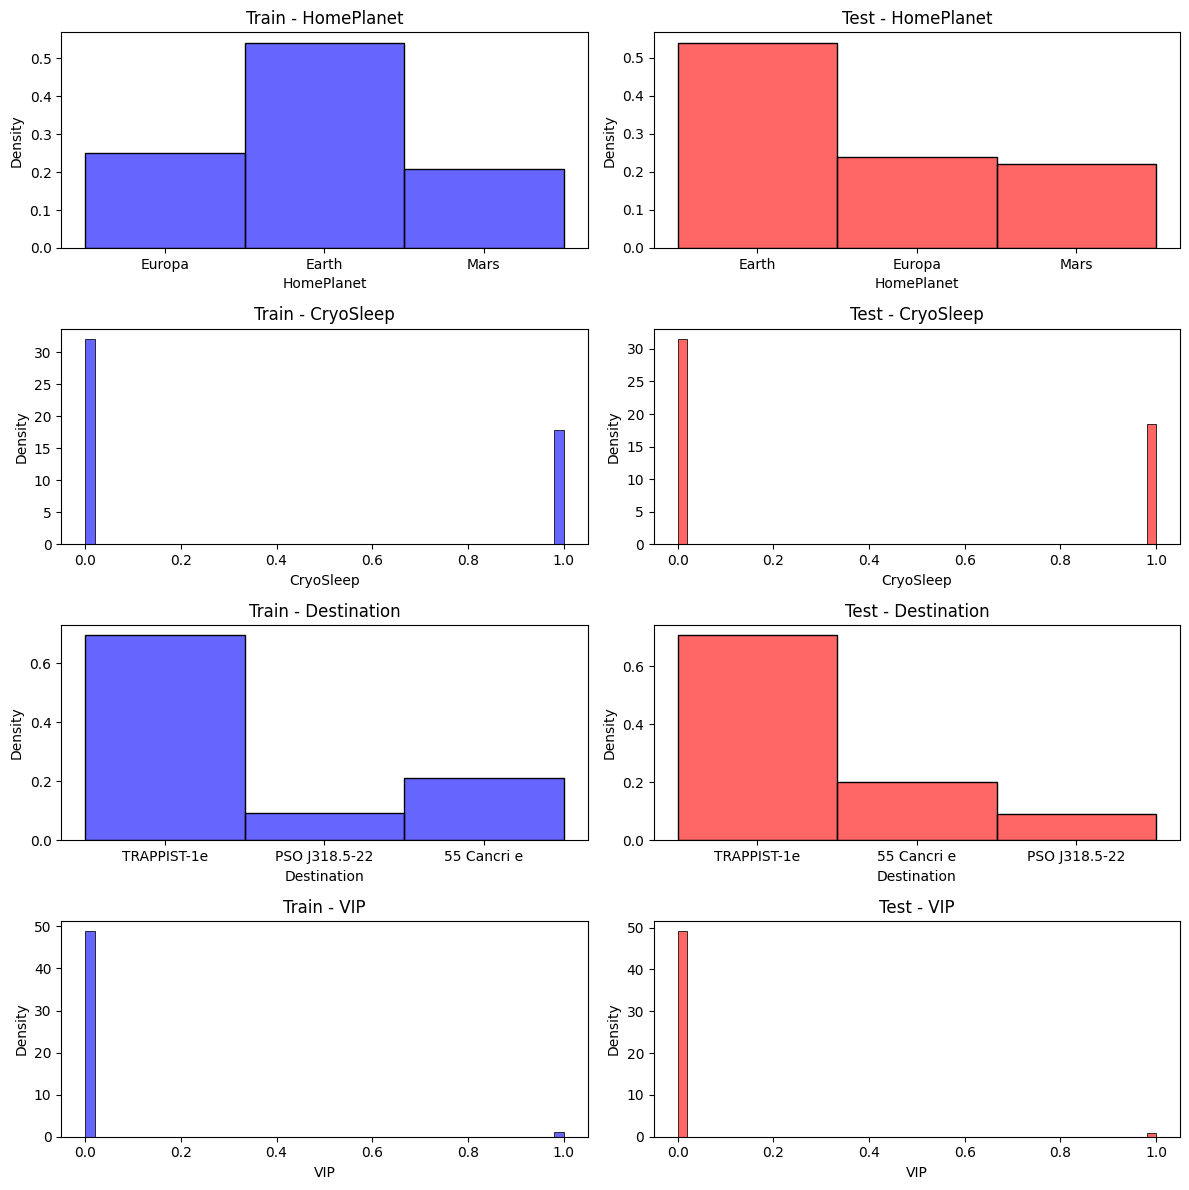

In [15]:
columns = ["HomePlanet","CryoSleep","Destination","VIP"]
bins = 50
n_rows = len(columns)
plt.figure(figsize=(12, n_rows * 3))

for i, col in enumerate(columns):
    if col not in train.columns or col not in test.columns:
        print(f"Warning: {col} train veya test dataframe'de yok, atlanıyor.")
        continue

    plt.subplot(n_rows, 2, 2*i + 1)
    sns.histplot(train[col], bins=bins, color="blue", stat="density", alpha=0.6)
    plt.title(f"Train - {col}")

    plt.subplot(n_rows, 2, 2*i + 2)
    sns.histplot(test[col], bins=bins, color="red", stat="density", alpha=0.6)
    plt.title(f"Test - {col}")

plt.tight_layout()
plt.show()

outlier görüntüleme

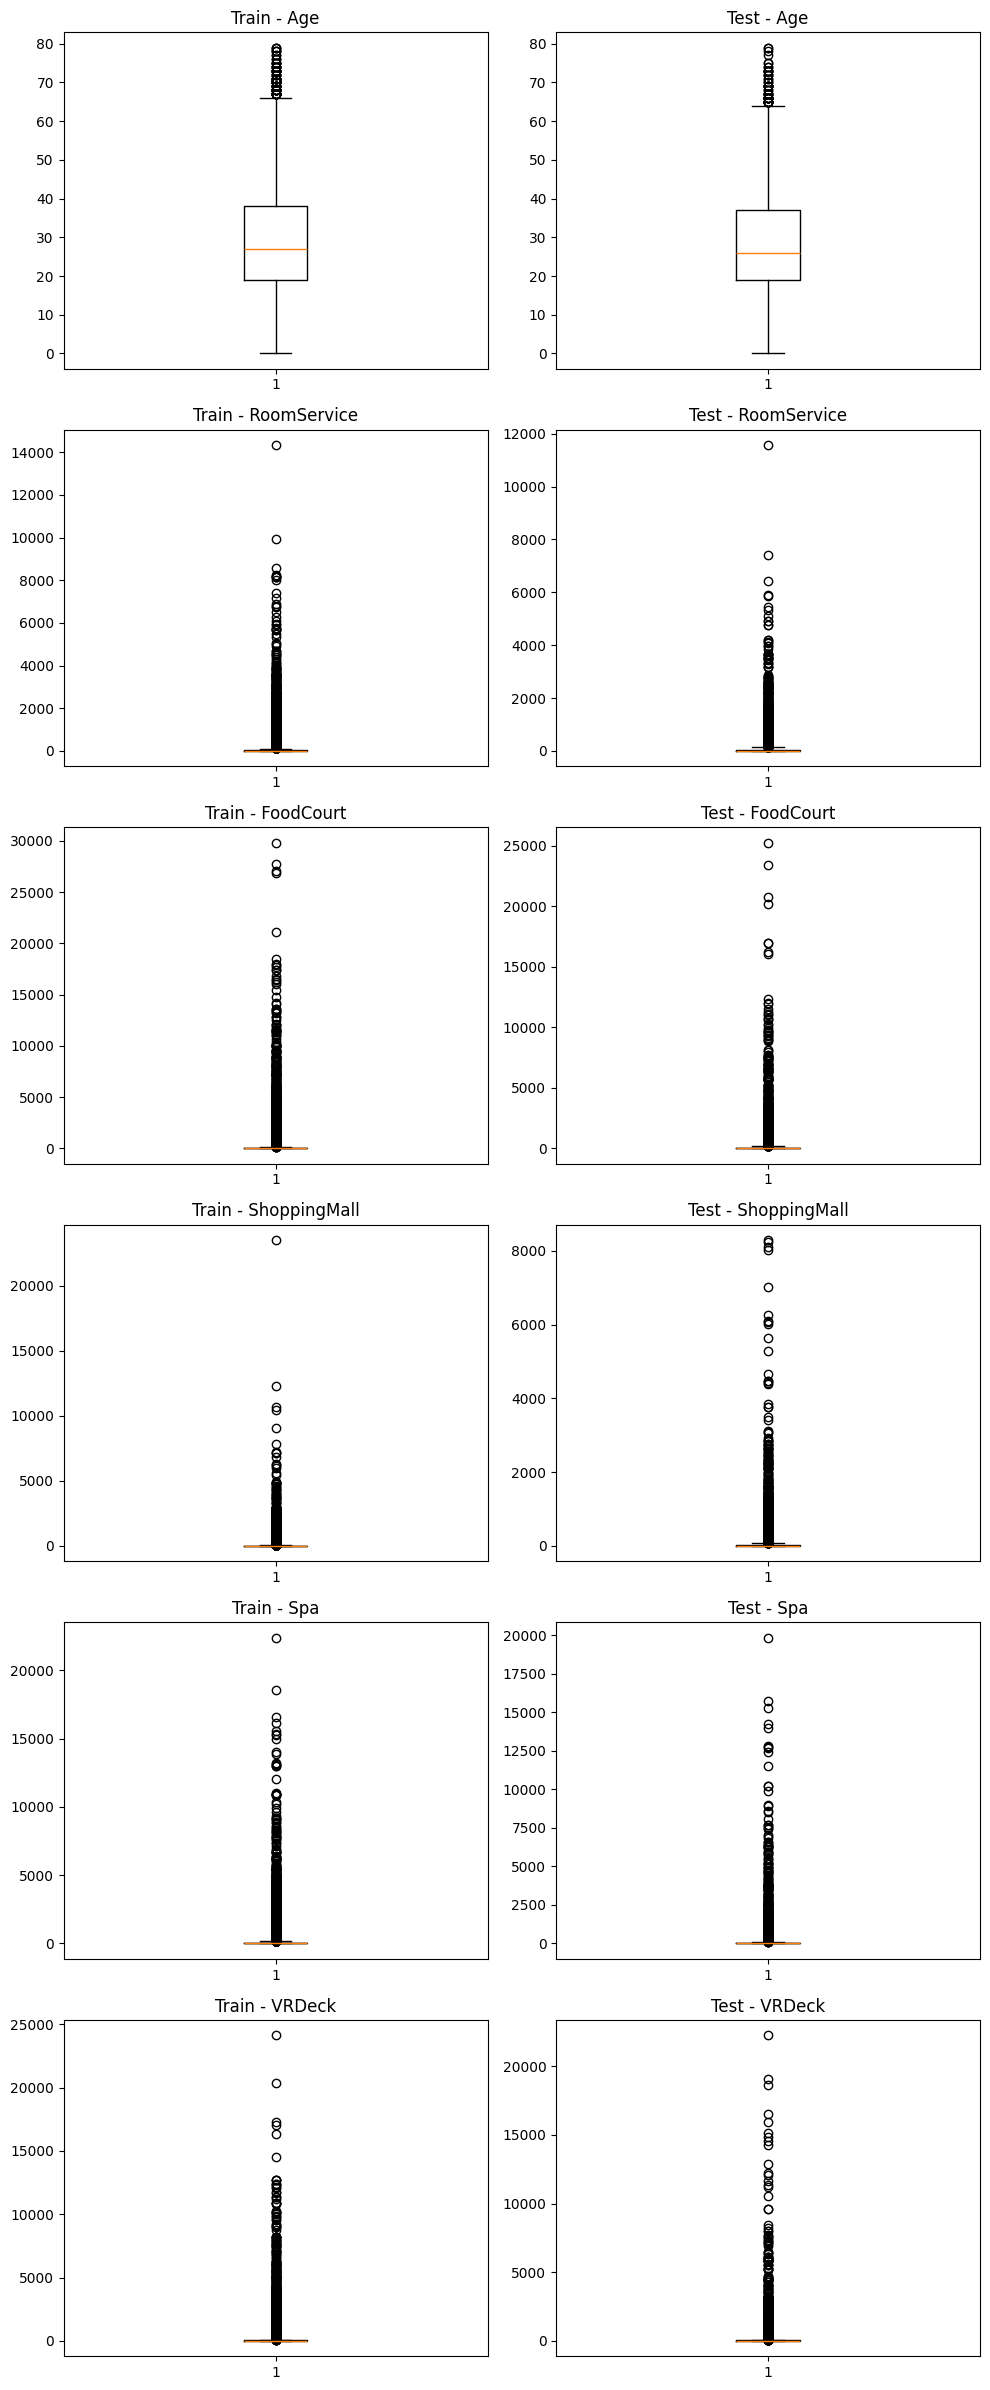

In [16]:
columns = train.select_dtypes(include=[np.number]).columns
n_rows = len(columns)
plt.figure(figsize=(10, n_rows * 4))

for i, col in enumerate(columns):

    plt.subplot(n_rows, 2, 2*i + 1)
    plt.boxplot(train[col].dropna())
    plt.title(f"Train - {col}")

    plt.subplot(n_rows, 2, 2*i + 2)
    plt.boxplot(test[col].dropna())
    plt.title(f"Test - {col}")

plt.tight_layout()
plt.show()

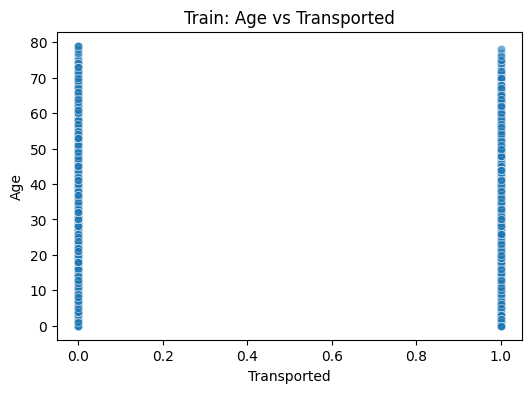

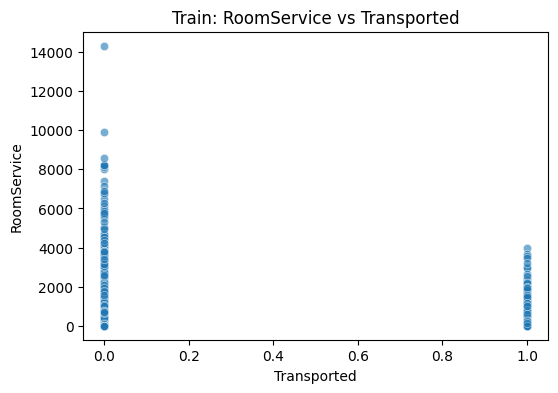

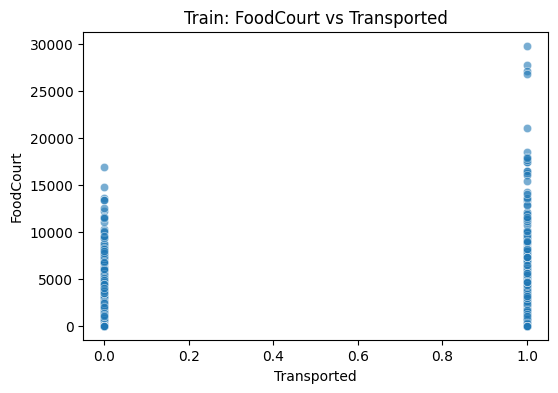

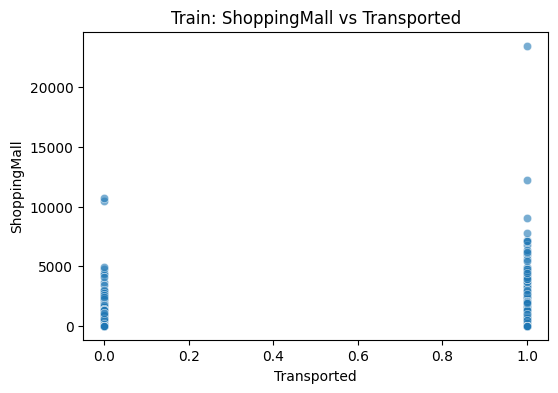

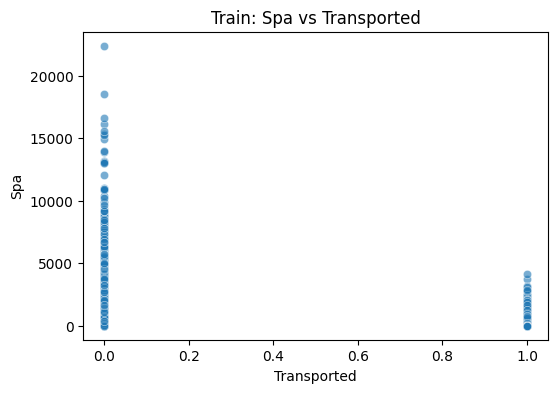

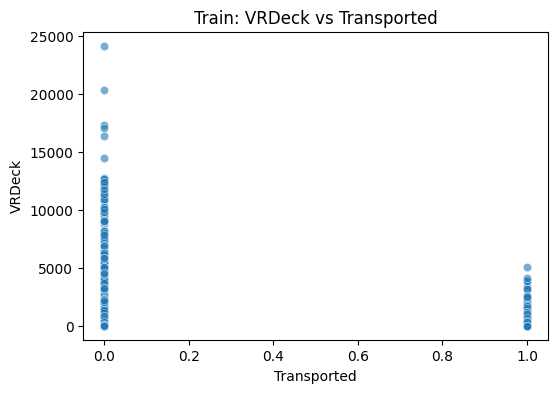

In [17]:
def numeric_columns_vs_label(train,label_col,numeric_cols):
    if numeric_cols is None:
        numeric_cols = train.select_dtypes(include="number").columns.tolist()
        if label_col in numeric_cols:
            numeric_cols.remove(label_col)

    for col in numeric_cols:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=label_col, y=col, data=train, alpha=0.6)
        plt.title(f"Train: {col} vs {label_col}")
        plt.xlabel(label_col)
        plt.ylabel(col)
        plt.show()

label_col = "Transported"
numeric_cols = train.select_dtypes(include=[np.number]).columns
numeric_columns_vs_label(train, label_col,numeric_cols)

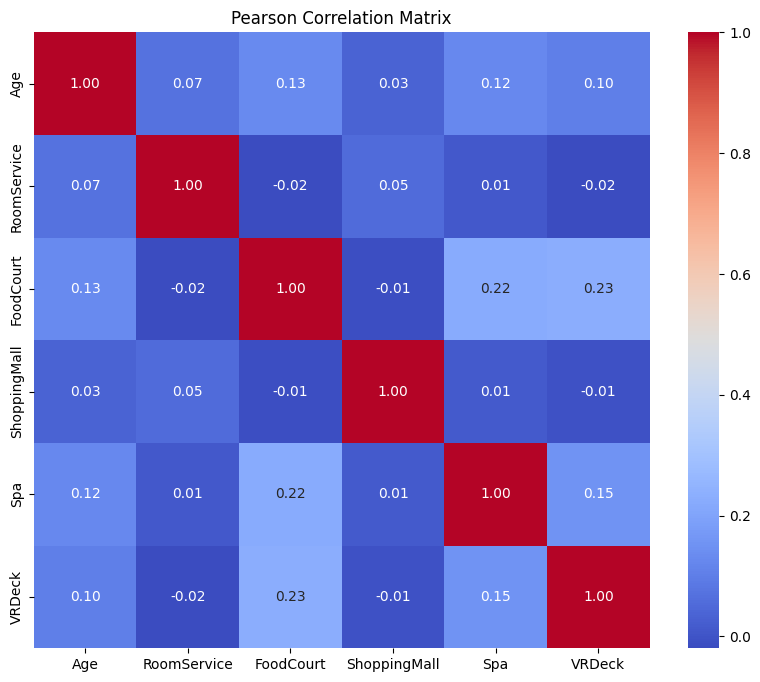

In [18]:
method="pearson"
if numeric_cols is None:
    numeric_cols = train.select_dtypes(include="number").columns

corr = train[numeric_cols].corr(method=method)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title(f"{method.capitalize()} Correlation Matrix")
plt.show()


# Preprocess

**Boş verileri Doldurma**

In [55]:
def fill_missing(train):
    train["CryoSleep"] = train["CryoSleep"].fillna(train["CryoSleep"].mode()[0])
    train["Cabin"] = train["Cabin"].fillna(train["Cabin"].mode()[0])
    train["Destination"] = train["Destination"].fillna(train["Destination"].mode()[0])
    train["VIP"] = train["VIP"].fillna(train["VIP"].mode()[0])
    train["HomePlanet"] = train["HomePlanet"].fillna(train["HomePlanet"].mode()[0])

    train["Age"] = train["Age"].fillna(train["Age"].median())
    train["RoomService"] = train["RoomService"].fillna(train["RoomService"].median())
    train["FoodCourt"] = train["FoodCourt"].fillna(train["FoodCourt"].median())
    train["ShoppingMall"] = train["ShoppingMall"].fillna(train["ShoppingMall"].median())
    train["Spa"] = train["Spa"].fillna(train["Spa"].median())
    train["VRDeck"] = train["VRDeck"].fillna(train["VRDeck"].median())

    return train

In [56]:
train = fill_missing(train)
test = fill_missing(test)

**Özellik çıkarımı**

In [57]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [58]:
def create_features(train):
    train[["CabinDeck", "CabinNum", "CabinSide"]] = train["Cabin"].str.split("/", expand=True)
    train["CabinNum"] = pd.to_numeric(train["CabinNum"], errors="coerce")

    spend_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
    train["TotalSpend"] = train[spend_cols].sum(axis=1)
    train["NoSpend"] = (train["TotalSpend"] == 0).astype(int)
    train["SpendPerAge"] = train["TotalSpend"] / train["Age"].replace(0, 1)

    train["GroupId"] = train["PassengerId"].str.split("_").str[0]
    group_sizes = train["GroupId"].value_counts()
    train["GroupSize"] = train["GroupId"].map(group_sizes)

    train["IsChild"] = (train["Age"] < 18).astype(int)
    train["LuxurySpender"] = ((train["Spa"] + train["VRDeck"]) > (0.5 * train["TotalSpend"])).astype(int)
    return train   

In [59]:
train = create_features(train)
test = create_features(test)

**encoding-Deleting**

In [60]:
bool_cols = train.select_dtypes(include="bool").columns
train[bool_cols] = train[bool_cols].astype(int)
bool_cols = test.select_dtypes(include="bool").columns
test[bool_cols] = test[bool_cols].astype(int)

In [61]:
train.select_dtypes(include=["object","category"]).nunique()

PassengerId    8693
HomePlanet        3
Cabin          6560
Destination       3
Name           8473
CabinDeck         8
CabinSide         2
GroupId        6217
dtype: int64

In [62]:
train.drop(["PassengerId","Cabin","Name","GroupId"],axis=1,inplace=True)
test.drop(["PassengerId","Cabin","Name","GroupId"],axis=1,inplace=True)

In [63]:
train["CabinSide"].unique()

array(['P', 'S'], dtype=object)

In [64]:
side_map = {"P": 0, "S": 1}
train["CabinSide"] = train["CabinSide"].map(side_map)
test["CabinSide"] = test["CabinSide"].map(side_map)

In [65]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
cat_cols = ["HomePlanet", "Destination", "CabinDeck"]

train_ohe = ohe.fit_transform(train[cat_cols])
test_ohe = ohe.transform(test[cat_cols])

train_ohe_df = pd.DataFrame(train_ohe, columns=ohe.get_feature_names_out(cat_cols), index=train.index)
test_ohe_df = pd.DataFrame(test_ohe, columns=ohe.get_feature_names_out(cat_cols), index=test.index)

train = pd.concat([train.drop(columns=cat_cols), train_ohe_df], axis=1)
test = pd.concat([test.drop(columns=cat_cols), test_ohe_df], axis=1)

In [66]:
train.dtypes

CryoSleep                      int64
Age                          float64
VIP                            int64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Transported                    int64
CabinNum                       int64
CabinSide                      int64
TotalSpend                   float64
NoSpend                        int64
SpendPerAge                  float64
GroupSize                      int64
IsChild                        int64
LuxurySpender                  int64
HomePlanet_Earth             float64
HomePlanet_Europa            float64
HomePlanet_Mars              float64
Destination_55 Cancri e      float64
Destination_PSO J318.5-22    float64
Destination_TRAPPIST-1e      float64
CabinDeck_A                  float64
CabinDeck_B                  float64
CabinDeck_C                  float64
CabinDeck_D                  float64
C

# Hyperparameter Search

In [37]:
X_train = train.drop(["Transported"],axis=1)
y_train = train["Transported"]

In [39]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

# Parametre grid
param_grid = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "C": [0.01, 0.1, 1, 10],
    "solver": ["lbfgs", "saga"],
    "l1_ratio": [0, 0.5, 1]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,               # 5-fold cross validation
    scoring="accuracy", # performans metriği
    n_jobs=-1,          # paralel çalıştır
    verbose=2
)

grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END .......C=0.01, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.01, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.01, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.01, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.01, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END .......C=0.01, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.01, l1_ratio=0, penalt

# Final

In [67]:
params = {'C': 0.01, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'lbfgs'}
model = LogisticRegression(max_iter=1000,**params)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [68]:
prediction = model.predict(test)

In [69]:
sample_submission["Transported"] = prediction
sample_submission["Transported"] = sample_submission["Transported"].map({0:False, 1:True})

In [70]:
sample_submission.to_csv("submission.csv",index=False)